# Portofolio: Regression Analysis - Understanding Key Factors Influencing Employee Compensation

# Business Understanding

## Introduction

Seblak prasmanan outlet wants to increase efficiency in managing human resource and making decision related to employee salary. Employee salary is determinated based on their individual negotiation and standard policy, without deep analysis related to factors that influence the salary. This causes unfairness in giving salary and decision that is not optimal in career development career.

## Objectives

This project aims to make company be able to:
- Set fair and competitive salary.
- Increase employee retention with giving appropiate compensation.
- Optimize budget for salary and allowance management.

## Tools and Dataset Needed

Tools we need for this project are python with its library (numpy, pandas, matplotlib, seaborn, and scikit-learn) and dataset has various variables like: age, distance, gender, years of working, status employment, and salary.

## Methodology

Regression analysis is statistical technique we used to build model related between one variable dependent with one or more independent variables. This model tries to predict continous variables after we input some values to independent variables. Independent here means factors that relate with dependent variable.

Evaluation for regression includes R2 or R-squared, Mean Absolute Error, and Root Means Squared Error. We also can plot error using residual plot.

# Data Understanding

## Data Acquisition

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('data/seblak_cook_salary.csv')

In [3]:
print(dataset.head())

   age  distance (km)  gender  years of working     status   salary
0   19          5.369  female                 0  permanent  3909000
1   19          7.731    male                 1   contract  3782000
2   22          7.421    male                 3   contract  4159000
3   24          3.278    male                 0   contract  4053000
4   23          5.763    male                 0   contract  3543000


## Data Profiling

In [4]:
# dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   distance (km)     1338 non-null   float64
 2   gender            1338 non-null   object 
 3   years of working  1338 non-null   int64  
 4   status            1338 non-null   object 
 5   salary            1338 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 62.8+ KB


In [5]:
# missing values
dataset.isna().sum()

age                 0
distance (km)       0
gender              0
years of working    0
status              0
salary              0
dtype: int64

In [6]:
# duplicated values
dataset.duplicated().sum()

1

In [7]:
dataset.drop_duplicates(inplace=True)

# duplicated values
dataset.duplicated().sum()

0

In [8]:
# correct wrong format

dataset['years of working'] = dataset['years of working'].astype('int64').astype(str)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   distance (km)     1337 non-null   float64
 2   gender            1337 non-null   object 
 3   years of working  1337 non-null   object 
 4   status            1337 non-null   object 
 5   salary            1337 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 73.1+ KB


## Descriptive Statistics

In [9]:
print(dataset.describe(exclude='object').round(3))

            age  distance (km)       salary
count  1337.000       1337.000     1337.000
mean     25.934          6.481  4073029.918
std       4.836          2.455   446757.371
min      19.000          0.563  3466000.000
25%      22.000          4.721  3760000.000
50%      26.000          6.375  4012000.000
75%      30.000          8.105  4307000.000
max      35.000         15.523  5724000.000


In [10]:
print(dataset.describe(exclude='number').round(3))

       gender years of working    status
count    1337             1337      1337
unique      2                6         2
top      male                0  contract
freq      675              573      1063


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [12]:
def distribution(x):
    s, p = stats.shapiro(x)
    if p > 0.05:
        print(f"the data is NORMALLY DISTRIBUTED with p-value {p}.")
    else:
        print(f"the variable is NOT NORMALLY DISTRIBUTED with p-value {p}.")

## NUMERIC

In [13]:
def num_viz(x):
    plt.figure(figsize=(16,5))
    sns.histplot(x=x)
    plt.show()

    plt.figure(figsize=(16,5))
    sns.boxplot(x=x, showmeans=True)
    plt.show()

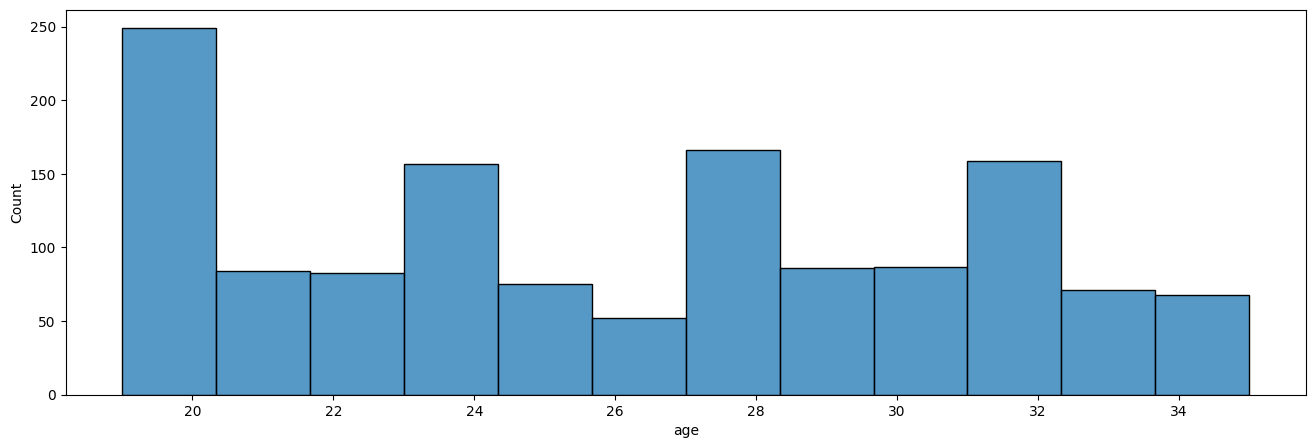

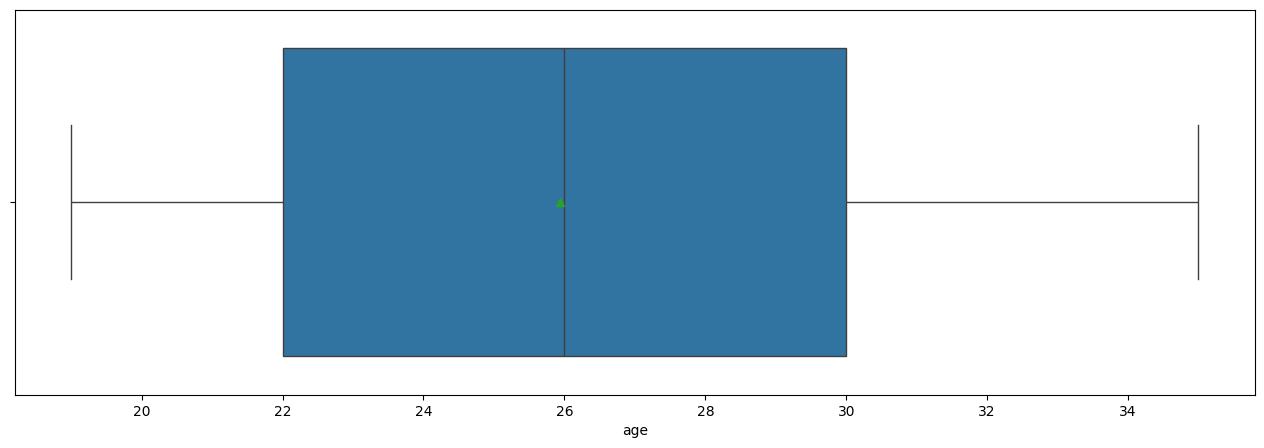

In [14]:
num_viz(dataset['age'])

In [15]:
distribution(dataset['age'])

the variable is NOT NORMALLY DISTRIBUTED with p-value 3.0713755647928806e-23.


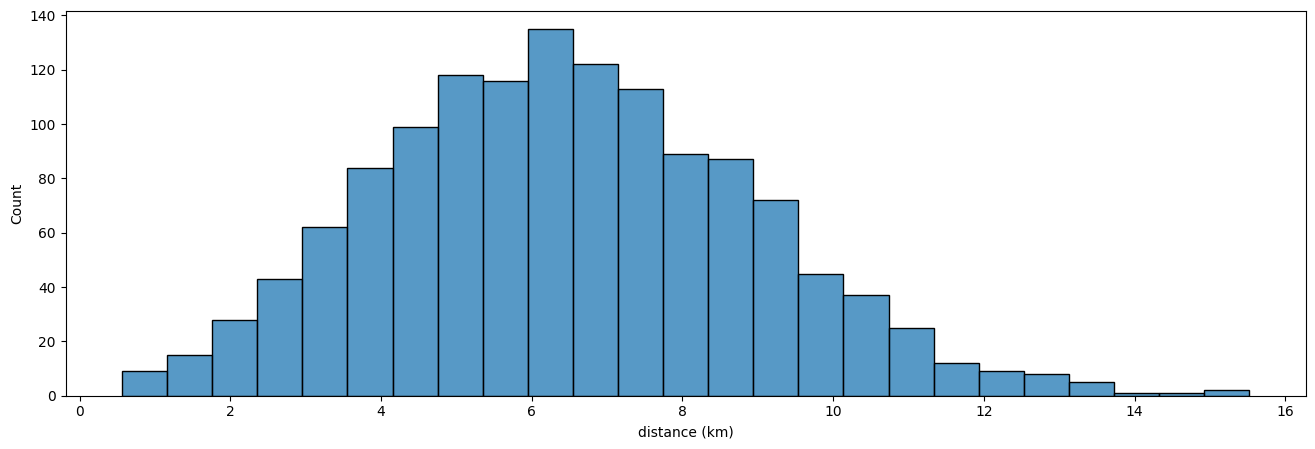

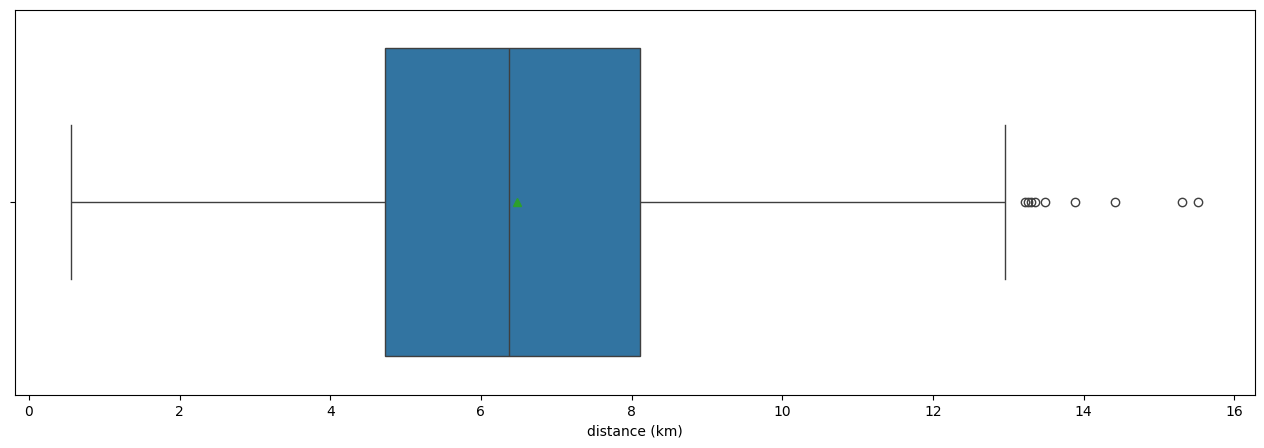

In [16]:
num_viz(dataset['distance (km)'])

In [17]:
distribution(dataset['distance (km)'])

the variable is NOT NORMALLY DISTRIBUTED with p-value 2.5740584999919672e-05.


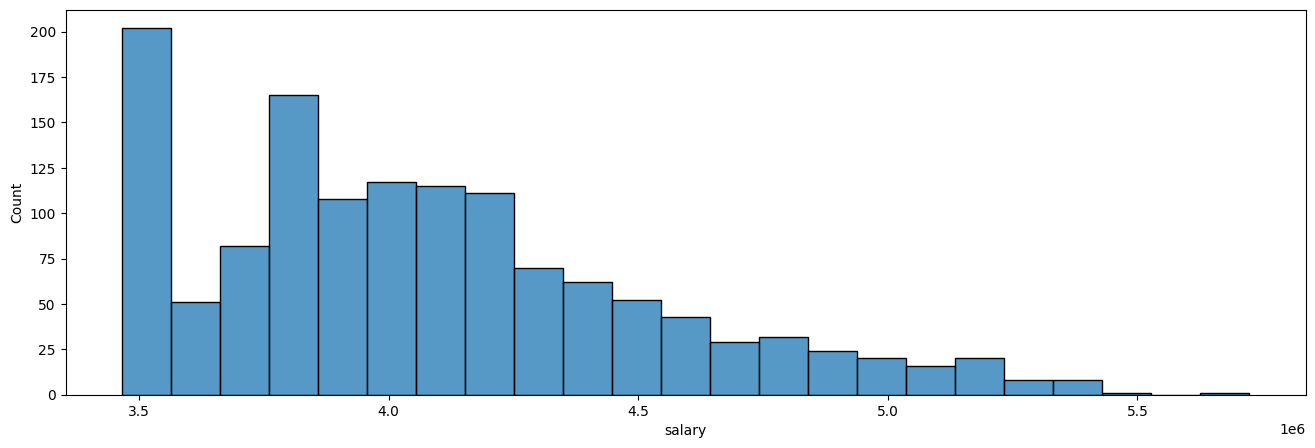

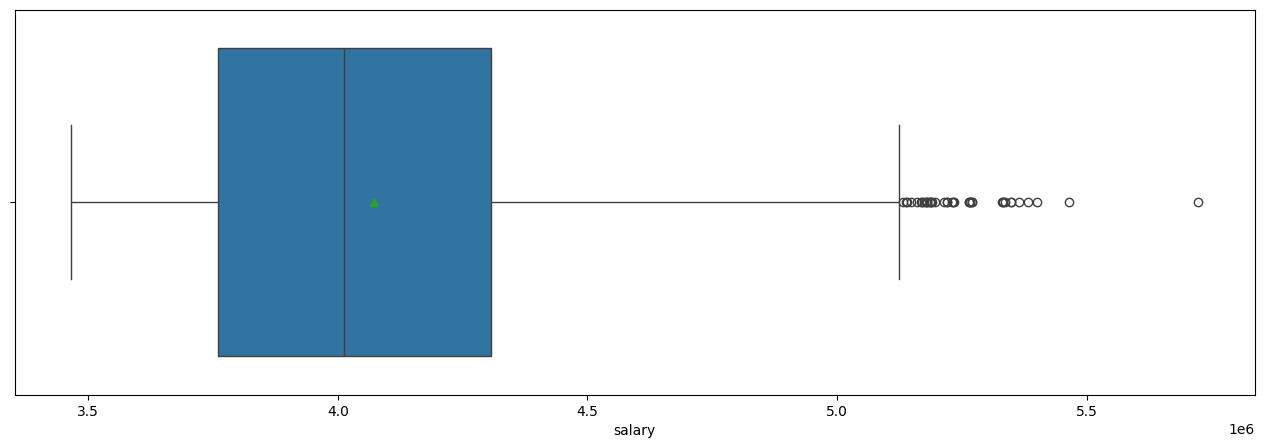

In [18]:
num_viz(dataset['salary'])

In [19]:
distribution(dataset['salary'])

the variable is NOT NORMALLY DISTRIBUTED with p-value 2.3251802350804323e-22.


## CATEGORICAL

In [20]:
def cat_viz(x, order=None):
    plt.figure(figsize=(5,5))
    ax = sns.countplot(x=x, order=order)
    ax.bar_label(ax.containers[0])
    plt.show()

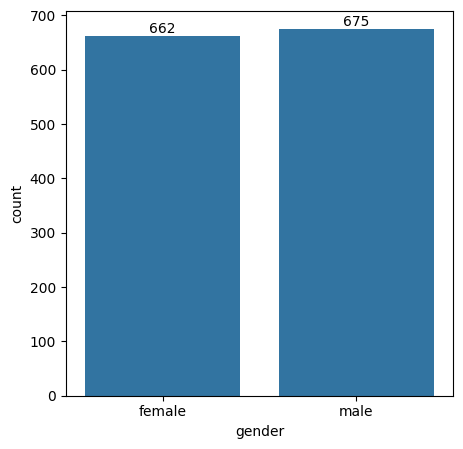

In [21]:
cat_viz(dataset['gender'])

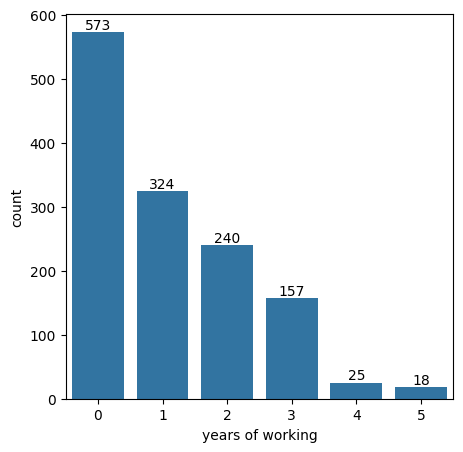

In [22]:
order = ['0','1','2','3','4','5']
cat_viz(dataset['years of working'], order)

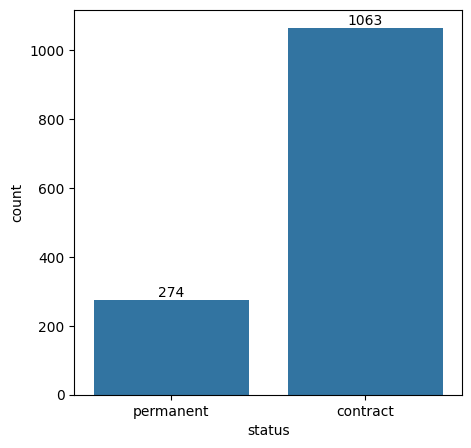

In [23]:
cat_viz(dataset['status'])

## MULTIVARIATE

In [24]:
def correl(data, x, y):
    s, p = stats.spearmanr(data[x], data[y])
    print(f"correlation between {x} and {y} is {s} with p-value {p}")

def student(data, ind, dep, x, y):
    a = data[data[ind] == x][dep]
    b = data[data[ind] == y][dep]

    s, p = stats.mannwhitneyu(a, b)
    if p > 0.05:
        print(f"there is no significant different mean between {dep} of {x} and {y} with p-value {p}")
    else:
                print(f"there is a significant different mean between {dep} of {x} and {y} with p-value {p}")

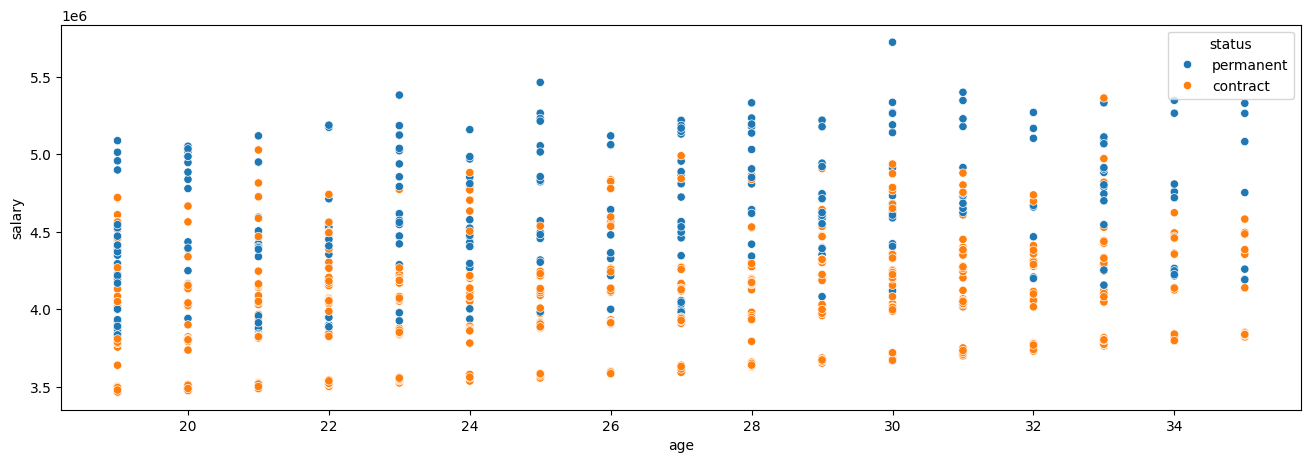

In [25]:
plt.figure(figsize=(16,5))
sns.scatterplot(dataset, x='age', y='salary', hue='status')
plt.show()

In [26]:
correl(dataset, 'age', 'salary')

correlation between age and salary is 0.2677533755542009 with p-value 2.1967819030868583e-23


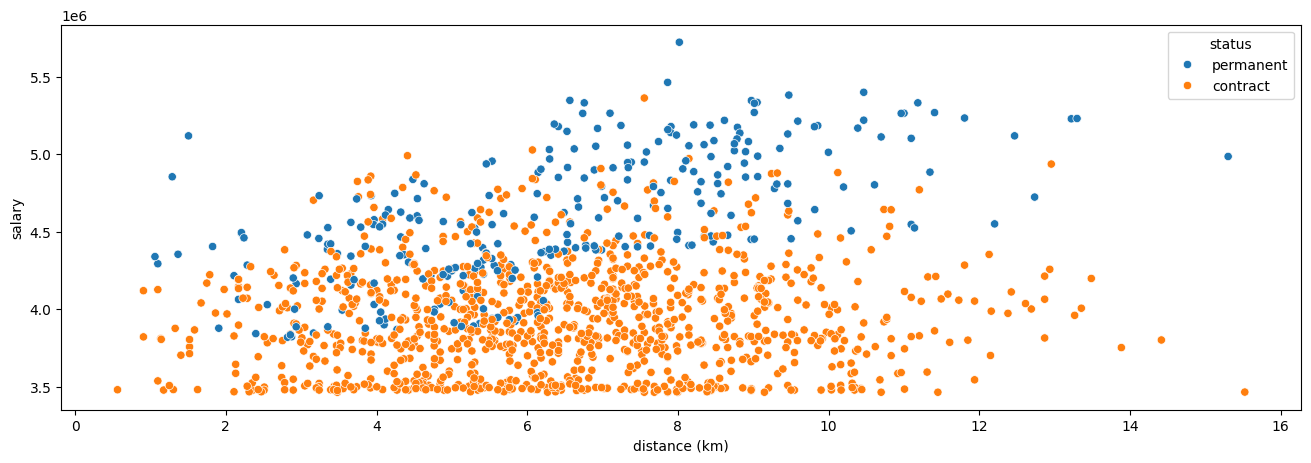

In [27]:
plt.figure(figsize=(16,5))
sns.scatterplot(dataset, x='distance (km)', y='salary', hue='status')
plt.show()

In [28]:
correl(dataset, 'distance (km)', 'salary')

correlation between distance (km) and salary is 0.11161612976582555 with p-value 4.309750076740309e-05


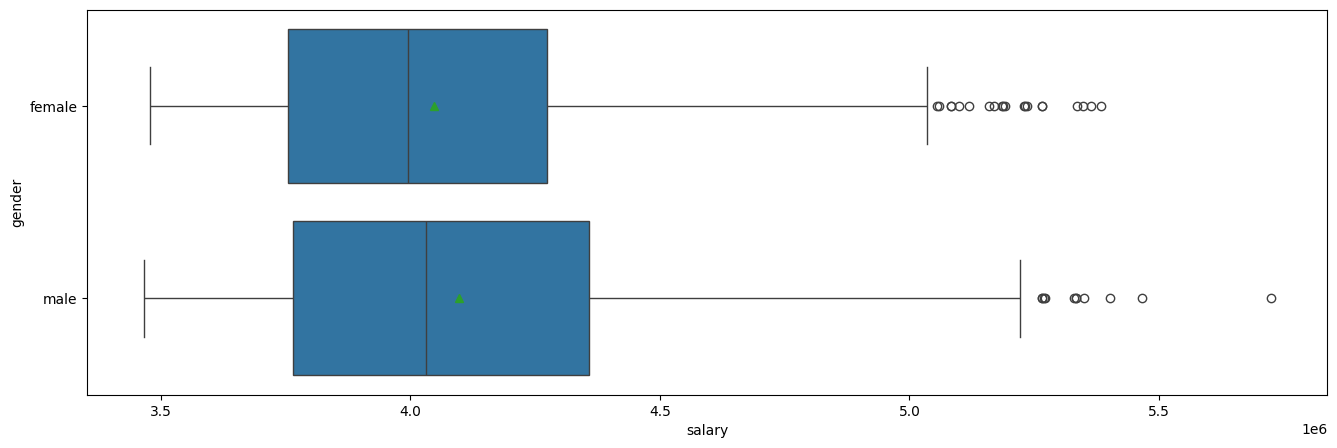

In [29]:
plt.figure(figsize=(16,5))
sns.boxplot(data=dataset, y='gender', x='salary', showmeans=True)
plt.show()

In [30]:
student(dataset,'gender', 'salary', 'male', 'female')

there is no significant different mean between salary of male and female with p-value 0.24937777852995913


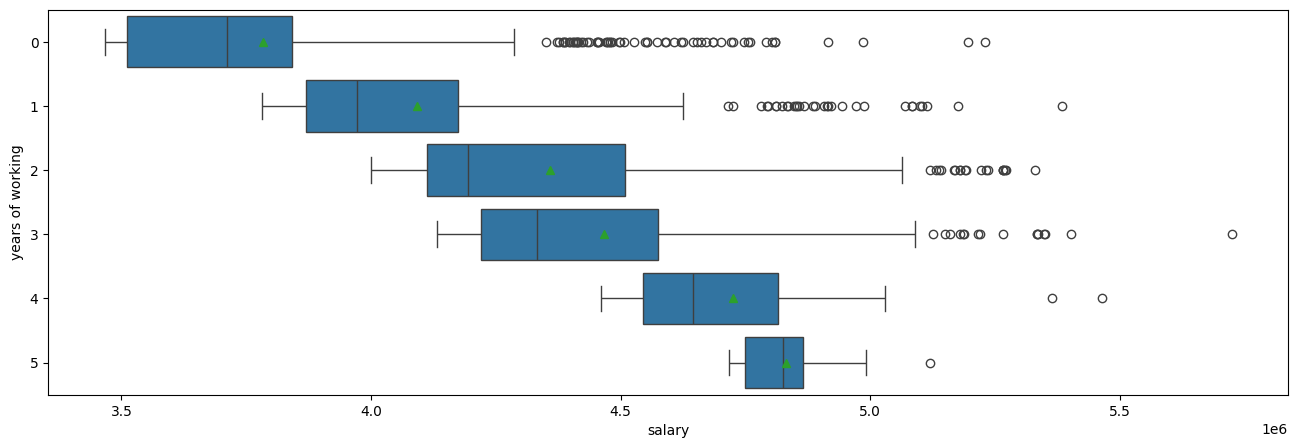

In [31]:
plt.figure(figsize=(16,5))
sns.boxplot(data=dataset, y='years of working', x='salary', showmeans=True, order=order)
plt.show()

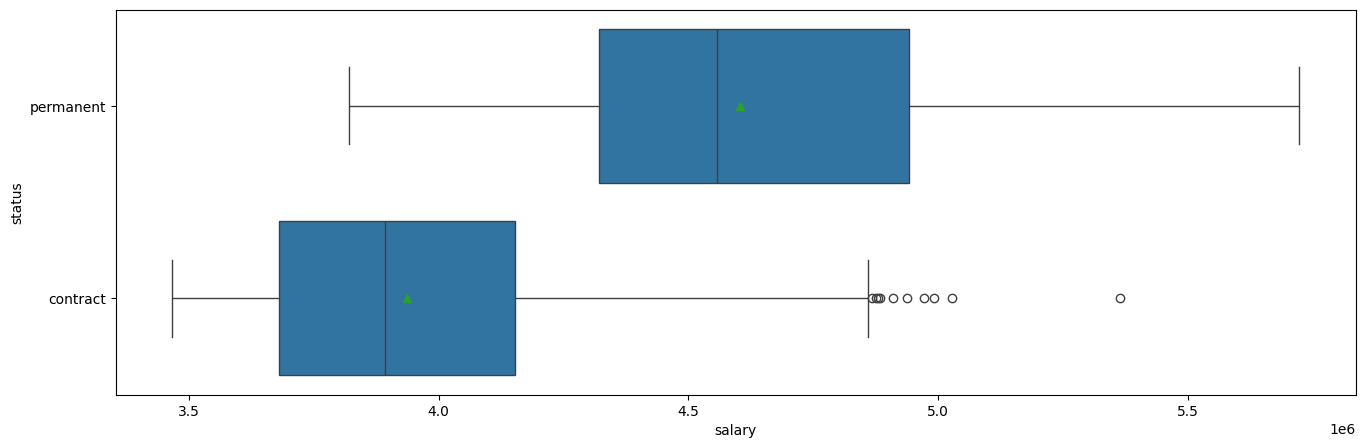

In [32]:
plt.figure(figsize=(16,5))
sns.boxplot(data=dataset, y='status', x='salary', showmeans=True)
plt.show()

In [33]:
student(dataset,'status', 'salary', 'permanent', 'contract')

there is a significant different mean between salary of permanent and contract with p-value 1.1067336628530867e-87


# Data Preprocessing

## Handling Outliers

In [34]:
def outlier_remover(data, variable):
    q3 = data[variable].quantile(.75)
    q1 = data[variable].quantile(.25)
    iqr = q3 - q1
    upper_line = q3 + (iqr * 1.5)
    lower_line = q1 - (iqr * 1.5)

    return data[(data[variable] <= upper_line) & (data[variable] >= lower_line)]

In [35]:
salary_clean = outlier_remover(dataset, 'salary')

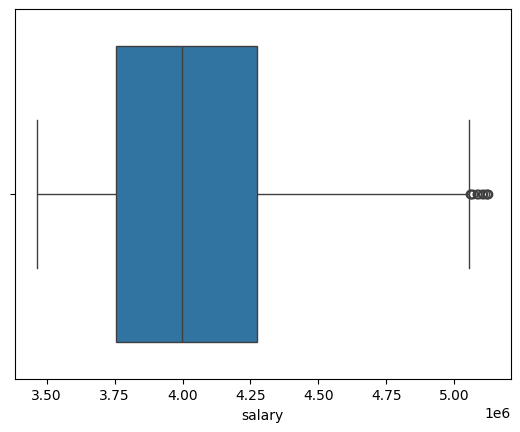

In [36]:
sns.boxplot(x=salary_clean['salary']);

We can try one more try cutting outliers.

In [37]:
salary_clean_two = outlier_remover(salary_clean, 'salary')

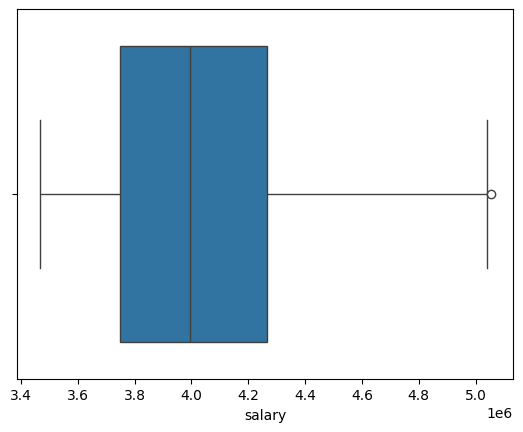

In [38]:
sns.boxplot(x=salary_clean_two['salary']);

Nice. Now, let's try to cut outliers from distance variable.

In [39]:
distance_clean = outlier_remover(salary_clean_two, 'distance (km)')

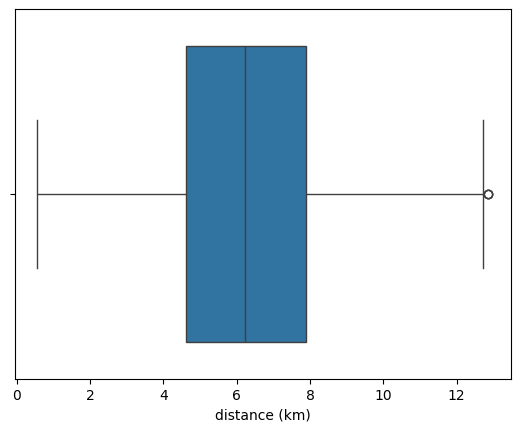

In [40]:
sns.boxplot(x=distance_clean['distance (km)']);

In [41]:
dataset_clean = distance_clean.copy()

In [42]:
x = dataset_clean.drop('salary', axis=1)
y = dataset_clean['salary']

In [43]:
categorical = x.select_dtypes(include='object')

In [44]:
numeric = x.select_dtypes(exclude='object')

In [45]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [46]:
encoder = OneHotEncoder()
scaler = MinMaxScaler()

In [47]:
x_categorical = encoder.fit_transform(categorical).toarray()
x_numeric = scaler.fit_transform(numeric)

In [79]:
def merge(cat, num):
    return np.concatenate((cat, num), axis=1)

In [80]:
X = merge(x_categorical, x_numeric)

In [50]:
X.shape

(1276, 12)

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

In [52]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42)

# Modeling

## Initial Model Understanding

In [53]:
from sklearn.linear_model import LinearRegression

In [130]:
reg = LinearRegression()
print(reg.fit(x_train, y_train))

LinearRegression()


In [55]:
pred = reg.predict(x_test)

In [56]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

In [57]:
print('r2score :', r2_score(y_test, pred).round(3))
print('mae :', mean_absolute_error(y_test, pred).round(3))
print('rmse :', root_mean_squared_error(y_test, pred).round(3))

r2score : 0.824
mae : 110612.0
rmse : 164278.93


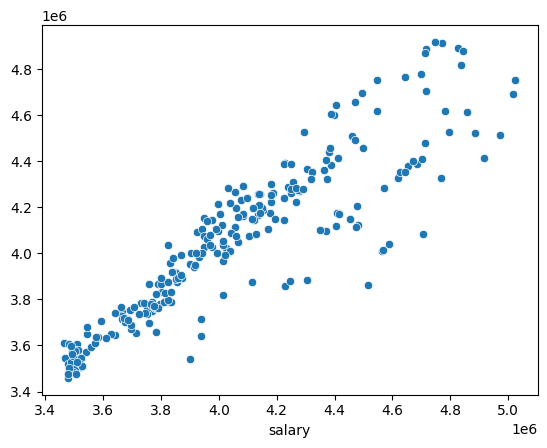

In [58]:
sns.scatterplot(x=y_test, y=pred);

## Comparing Models

In [59]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from lightgbm import DaskLGBMRegressor, LGBMRegressor

In [60]:
models = [
    AdaBoostRegressor(),
    KNeighborsRegressor(),
    XGBRegressor(),
    XGBRFRegressor()]

In [61]:
names = [
    'ada_boost',
    'k-nearest_neighbor',
    'xgb_gradient_boost',
    'xgb_random_forest',]

In [62]:
score = []
mae = []
rmse = []

for i in models:
    score_ = np.mean(cross_val_score(i, X=x_train, y=y_train, cv=5)).round(3)
    score.append(score_)
    reg = i
    reg.fit(x_train, y_train)
    pred = reg.predict(x_test)
    mae_ = mean_absolute_error(y_test, pred).round(3)
    mae.append(mae_)
    rmse_ = root_mean_squared_error(y_test, pred).round(3)
    rmse.append(rmse_)

In [117]:
print(pd.DataFrame({
    'name': names,
    'score': score,
    'mae': mae,
    'rmse': rmse
}))

                 name  score         mae        rmse
0           ada_boost  0.726  177825.197  198155.635
1  k-nearest_neighbor  0.834   98750.781  162789.011
2  xgb_gradient_boost  0.839   90337.450  154496.369
3   xgb_random_forest  0.880   77025.460  126344.339


## Hyperparameter Tuning

In [64]:
params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [65]:
random = GridSearchCV(
    XGBRFRegressor(),
    params, 
    scoring='r2',
    cv=5, 
    verbose=1)

In [66]:
print(random.fit(x_train, y_train))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
GridSearchCV(cv=5,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      feature_weights=None, gamma=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_ca...
                                      max_delta_step=None, max_depth=None,
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone

In [67]:
random.best_score_

0.8741889505217613

In [68]:
random.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [113]:
pred = random.predict(x_test)

In [127]:
print('r2score :', r2_score(y_test, pred).round(3))
print('mae :', mean_absolute_error(y_test, pred).round(3))
print('rmse :', root_mean_squared_error(y_test, pred).round(3))

r2score : 0.894
mae : 80822.933
rmse : 127597.995


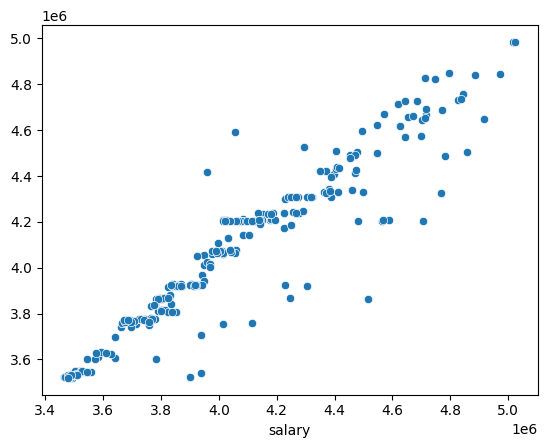

In [116]:
sns.scatterplot(x=y_test, y=pred);

## Build Model

In [69]:
model = XGBRFRegressor(**random.best_params_)

In [131]:
print(model.fit(X=X, y=y))

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, min_samples_leaf=1, min_samples_split=2,
               missing=nan, monotone_constraints=None, multi_strategy=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None, ...)


In [111]:
model.score(X,y)

0.8958682356020142

In [128]:
prediction = model.predict(X)

In [129]:
print('r2score :', r2_score(y, prediction).round(3))
print('mae :', mean_absolute_error(y, prediction).round(3))
print('rmse :', root_mean_squared_error(y, prediction).round(3))

r2score : 0.896
mae : 75479.321
rmse : 125482.096


In [119]:
value = model.feature_importances_

In [120]:
feature = np.hstack((encoder.get_feature_names_out(), scaler.get_feature_names_out()))

In [125]:
fitur_selection = pd.DataFrame({
    'feature': feature,
    'value': value.round(3)
})

In [126]:
print(fitur_selection)

               feature  value
0        gender_female  0.000
1          gender_male  0.000
2   years of working_0  0.328
3   years of working_1  0.045
4   years of working_2  0.013
5   years of working_3  0.035
6   years of working_4  0.023
7   years of working_5  0.039
8      status_contract  0.244
9     status_permanent  0.255
10                 age  0.007
11       distance (km)  0.011


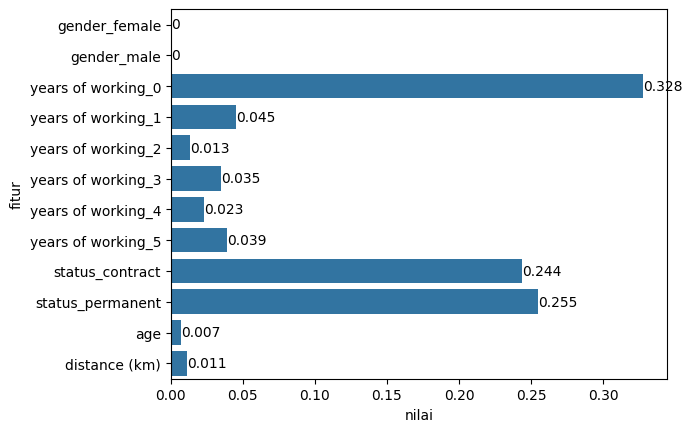

In [109]:
ax = sns.barplot(fitur_selection, y='fitur', x='nilai')
ax.bar_label(ax.containers[0])
plt.show()

# Insights

## Interpretation and Reporting

**1. Employee Demographic Profile:**
- The mean employee age is 25.93 years (SD = 4.83 years), with a range of 19 to 35 years. The age distribution deviates significantly from a normal distribution (p < 0.001).
- The average distance between employees' residences and the office is 6.48 km (SD = 2.46 km), with distances ranging from 0.56 km to 15.52 km. The distribution of commute distances also does not follow a normal distribution (p < 0.001).
- The mean employee salary is Rp 4,073,029 (SD = Rp 446,757), with a minimum of Rp 3,466,000 and a maximum of Rp 5,724,000. The salary distribution is non-normal (p < 0.001).
- The workforce comprises 675 male employees and 662 female employees.
- The distribution of employee tenure is as follows: less than 1 year (573), 1 year (324), 2 years (240), 3 years (157), 4 years (25), and 5 years (18). A significant proportion of the workforce has a tenure of under one year.
- The majority of employees are on contract (1063), significantly outnumbering permanent employees (271).

**2. Correlation and Comparative Analysis:**
- A weak but statistically significant positive correlation exists between age and salary (r = 0.268, p < 0.001).
-A very weak but statistically significant positive correlation is observed between commute distance and salary (r = 0.112, p < 0.001).
- No statistically significant difference was found in the mean salaries of male and female employees (p = 0.249).
- A highly statistically significant difference exists in the mean salaries of contract and permanent employees (p < 0.001), with permanent employees tending to have higher salaries.

**3. Salary Prediction Modeling:**
- Outliers in salary and commute distance variables were identified and addressed to enhance the predictive model's robustness.
- The initial regression model yielded an R-squared of 0.824, a Mean Absolute Error (MAE) of Rp 110,612.0, and a Root Mean Squared Error (RMSE) of Rp 164,278.93.
- Comparative evaluation of various regression algorithms indicated that XGBoost Random Forest outperformed AdaBoost and K-Nearest Neighbors. The optimal pre-hyperparameter tuning results were: R² = 0.880, MAE = Rp 77,025.460, and RMSE = Rp 126,344.339.
- Following hyperparameter tuning of the XGBoost Random Forest model, significant performance improvement was observed on the test data: R² = 0.894, MAE = Rp 80,822.933, and RMSE = Rp 127,597.995, with the following optimal parameters: {'max\_depth': 5, 'min\_samples\_leaf': 1, 'min\_samples\_split': 2, 'n\_estimators': 100}.
- When the tuned model was applied to the entire dataset, enhanced results were achieved: R² = 0.896, MAE = Rp 75,479.321, and RMSE = Rp 125,482.096.

**4. Key Factors Influencing Salary Prediction:**

Based on feature importance analysis from the XGBoost Random Forest model, the following variables demonstrated the most significant influence on salary prediction:

* Tenure (particularly tenure of 0 years)
* Employment Status (contract and permanent)
* Age
* Commute Distance
* Gender (while individual category importance is relatively low, the inclusion of gender information contributes to the model)

## Action

**Key Focus:**

* **Reviewing How We Pay Based on Time and Employment Type:** The fact that how long someone has worked here (especially if it's less than a year) and whether they are contract or permanent are the biggest things affecting their salary, along with the clear difference in pay between these two groups, tells us we need to take a closer look at our current pay structure.

**Actionable Recommendations:**

1.  **Taking a Deeper Dive into Our Current Pay System:**
    * **Looking at Pay Steps for Years of Service:** We need to analyze more closely how salaries go up as people stay with the company longer. Are these pay increases fair and competitive at each stage?
    * **Understanding the Pay Gap Between Contract and Permanent Staff:** Let's figure out the reasons behind the significant salary difference between contract and permanent employees. We should consider things like benefits, perks, and the nature of the job. We need to make sure these differences are fair and make sense.
    * **Checking Against Industry Standards:** Let's compare our salaries for different levels of experience and employment types with similar companies in our industry and around Bogor. This will help us see if our pay is competitive.

2.  **Making Our Approach to Contract Employees Better:**
    * **Thinking About Why We Hire Contract Employees:** Let's make sure we're using contract employees for the right reasons, like temporary projects or seasonal needs.
    * **Considering Career Paths for Contract Employees:** If it makes sense, let's think about offering contract employees who do well the chance to become permanent after a certain time. This could help keep them motivated and want to stay.
    * **Looking at Benefits for Contract Employees:** Even if their base pay is different, let's make sure the benefits contract employees get meet basic standards and feel fair.

3.  **Considering Age and Distance in Our Policies:**
    * **Analyzing the Link Between Age and Pay More:** Even though it's not a strong link, the fact that older employees tend to earn a bit more is something we should understand better. Does this just reflect normal career growth and experience? We need to make sure there's no unfairness based on age in our pay.
    * **Thinking About Help with Commuting Costs:** Even though the link is very weak, how far someone lives plays a small role in predicting their salary. We might want to think about looking at or offering some help with transportation costs, especially for those who travel a long way, to make things better for them.

4.  **Making Sure Pay is Fair for Everyone, Regardless of Gender:**
    * **Even Though Averages Look Okay:** We should still regularly check salaries based on the specific job and responsibilities to make sure there are no hidden gender biases in how we pay people at a more detailed level.
    * **Keeping an Eye on Pay Differences Between Genders Over Time:** We need to keep tracking salary data by gender to make sure no unfair pay gaps appear.

# Further Analysis
- Perform A/B testing to compare internal and external salary.
- Conduct cohort analysis to understand the relationship between salary and employee retention.
- Do churn analysis understand what factors contribute the most for turnover intention.